<a href="https://colab.research.google.com/github/Raymay3/MAT422/blob/main/HW%203.5%2C%203.6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Section 3.5. K-means**

***K-Means Clustering***

K-Means clustering is an unsupervised learning algorithm that partitions a dataset into *k* clusters. The goal is to assign each data point to the cluster with the closest centroid. The algorithm minimizes the *within-cluster sum of squares (WCSS)*, which is the sum of squared distances between data points and their respective cluster centroids.

**Key Mathematical Concepts**

1. How to initialize cluster centroids.
2. How to assign data points to the nearest cluster.
3. How to recompute cluster centroids.
4. The convergence of the algorithm as WCSS decreases.

**Example 1: Implementing K-Means from Scratch**

Let's walk through the process of implementing K-Means clustering. We will explain each step and demonstrate it in code.

*Step 1: Initializing Cluster Centroids*

To begin, we randomly initialize *k* cluster centroids from the dataset.

*Step 2: Assigning Data Points to Clusters*

For each data point, we assign it to the cluster whose centroid is closest, based on the Euclidean distance.

*Step 3: Recomputing Cluster Centroids*

Once all data points are assigned to clusters, we compute the new centroids of each cluster by averaging the data points in the cluster.

*Step 4: Iteration and Convergence*

We repeat steps 2 and 3 until the centroids no longer change or the data points remain in the same cluster across consecutive iterations. The objective function (WCSS) decreases in each iteration, leading to convergence.

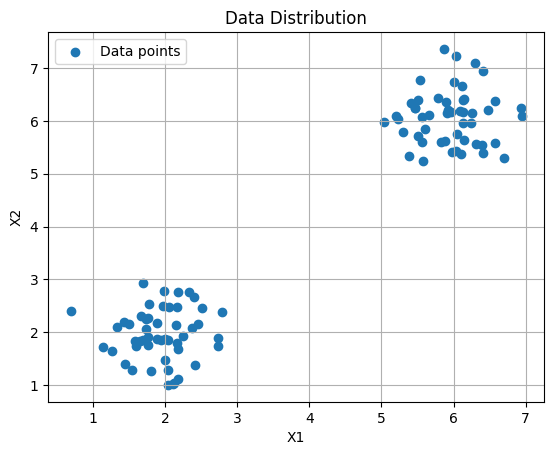

Converged after 1 iterations.


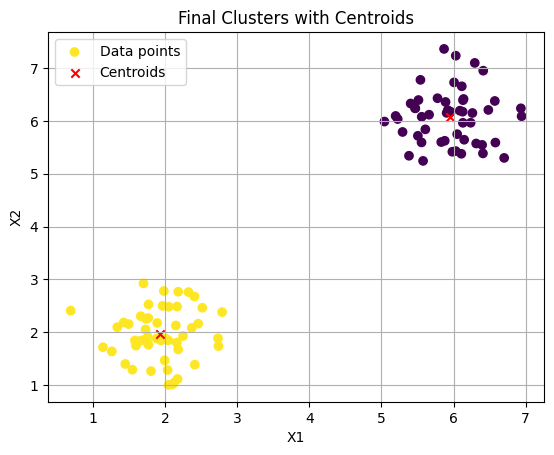

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Euclidean distance function
def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

# Step 1: Initialize cluster centroids randomly
def initialize_centroids(X, k):
    indices = np.random.choice(X.shape[0], size=k, replace=False)
    return X[indices, :]

# Step 2: Assign data points to the nearest cluster
def assign_clusters(X, centroids):
    clusters = []
    for point in X:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        clusters.append(np.argmin(distances))
    return np.array(clusters)

# Step 3: Recompute centroids of clusters
def compute_centroids(X, clusters, k):
    new_centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        points_in_cluster = X[clusters == i]
        new_centroids[i] = np.mean(points_in_cluster, axis=0)
    return new_centroids

# Step 4: K-Means algorithm
def kmeans(X, k, max_iterations=100):
    # Initialize centroids
    centroids = initialize_centroids(X, k)

    for iteration in range(max_iterations):
        # Assign clusters
        clusters = assign_clusters(X, centroids)

        # Compute new centroids
        new_centroids = compute_centroids(X, clusters, k)

        # Check for convergence
        if np.all(new_centroids == centroids):
            print(f"Converged after {iteration} iterations.")
            break

        centroids = new_centroids

    return centroids, clusters

# Generate synthetic data for demonstration
np.random.seed(42)
X1 = np.random.normal(loc=[2, 2], scale=0.5, size=(50, 2))
X2 = np.random.normal(loc=[6, 6], scale=0.5, size=(50, 2))
X = np.vstack((X1, X2))

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], label="Data points")
plt.title("Data Distribution")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.legend()
plt.show()

# Apply K-Means
k = 2
centroids, clusters = kmeans(X, k)

# Plot final clusters
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', label="Data points")
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', label="Centroids", marker="x")
plt.title("Final Clusters with Centroids")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.legend()
plt.show()

**Explanation:**

1. *Initialization of centroids*: We randomly select *k* data points as the initial centroids. This step ensures that the initial guess of cluster centers is diverse.
   
2. *Assigning clusters*: For each data point, we compute the Euclidean distance between the point and each of the centroids. The point is assigned to the cluster corresponding to the nearest centroid.

3. *Recomputing centroids*: After the points are assigned to clusters, we update the centroids by computing the mean of the points in each cluster.

4. *Convergence*: The algorithm continues until the centroids no longer change (i.e., convergence). This happens when the clusters stabilize, and no point switches to a different cluster.

---

**Example 2: Tracking WCSS Over Iterations**

In this example, we will track the *within-cluster sum of squares (WCSS)* at each iteration to demonstrate that the algorithm converges by minimizing WCSS.

Converged after 2 iterations.


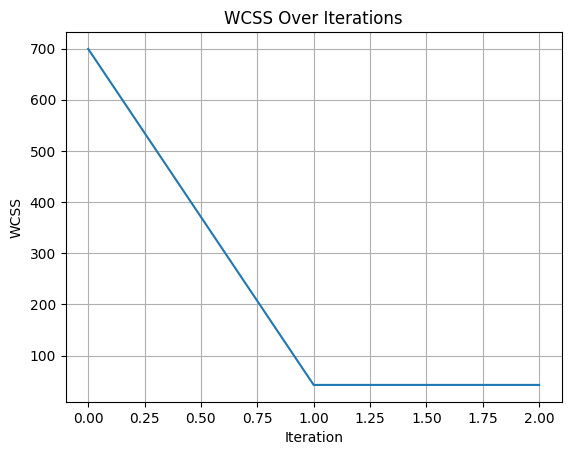

In [3]:
# Compute WCSS (within-cluster sum of squares)
def compute_wcss(X, clusters, centroids):
    wcss = 0
    for i, centroid in enumerate(centroids):
        points_in_cluster = X[clusters == i]
        wcss += np.sum((points_in_cluster - centroid) ** 2)
    return wcss

# Modified K-Means with WCSS tracking
def kmeans_with_wcss(X, k, max_iterations=100):
    centroids = initialize_centroids(X, k)
    wcss_values = []

    for iteration in range(max_iterations):
        clusters = assign_clusters(X, centroids)
        new_centroids = compute_centroids(X, clusters, k)
        wcss = compute_wcss(X, clusters, new_centroids)
        wcss_values.append(wcss)

        if np.all(new_centroids == centroids):
            print(f"Converged after {iteration} iterations.")
            break

        centroids = new_centroids

    return centroids, clusters, wcss_values

# Apply K-Means with WCSS tracking
centroids, clusters, wcss_values = kmeans_with_wcss(X, k)

# Plot WCSS over iterations
plt.plot(wcss_values)
plt.title("WCSS Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

**Explanation:**

- *WCSS* measures how tightly data points are grouped within each cluster. The goal of K-Means is to minimize WCSS, and thus each iteration of the algorithm should decrease the WCSS.
  
- The plot shows that WCSS decreases over time, illustrating the convergence of the K-Means algorithm. As K-Means continues, the clusters stabilize, and the WCSS reaches a minimum.

# **Section 3.6. Support Vector Machine**

Support Vector Machines (SVMs) are supervised learning models that aim to classify data points by finding the optimal hyperplane that separates two classes of data. The primary goal is to maximize the margin between data points of two categories, making future predictions more robust.

In this section, we will demonstrate key concepts of SVM, including:
1. The basic concept of a hyperplane and margin.
2. The optimization problem used to find the optimal hyperplane.
3. Solving the optimization problem with gradient descent.
4. An application of SVM using real-world data.

**Key Mathematical Concepts**

1. *Hyperplane and Margins*: A hyperplane is defined as a boundary that separates the two classes of data points. The margin is the distance between the hyperplane and the closest data points (called support vectors).
2. *Optimization Problem*: The optimization objective is to maximize the margin while ensuring that data points lie on the correct side of the margin.
3. *Gradient Descent*: We use gradient descent to solve the SVM optimization problem, adjusting the weights and bias of the hyperplane to minimize the error.

---

**Example 1: Visualizing the SVM Hyperplane and Margins**

We'll start by generating some simple linearly separable data and visualizing how the SVM hyperplane divides the two classes. We'll also highlight the support vectors that lie on the margins.

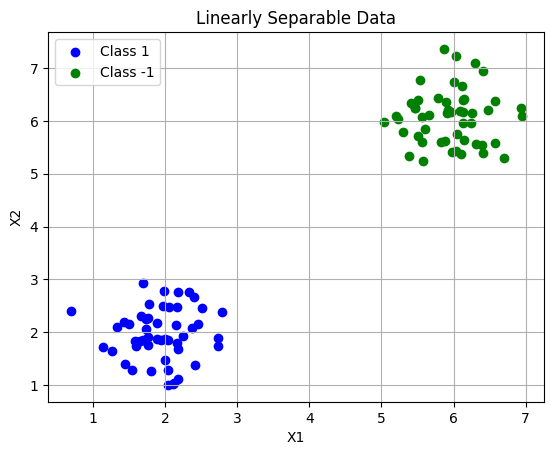

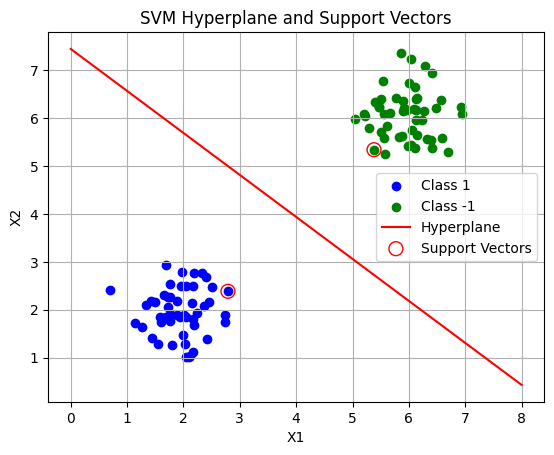

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Generate linearly separable data
np.random.seed(42)
X1 = np.random.normal(loc=[2, 2], scale=0.5, size=(50, 2))
X2 = np.random.normal(loc=[6, 6], scale=0.5, size=(50, 2))

X = np.vstack((X1, X2))
y = np.hstack((np.ones(50), -np.ones(50)))

# Plot data
plt.scatter(X1[:, 0], X1[:, 1], color='blue', label='Class 1')
plt.scatter(X2[:, 0], X2[:, 1], color='green', label='Class -1')
plt.title("Linearly Separable Data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid(True)
plt.show()

# Train a support vector machine
clf = SVC(kernel='linear')
clf.fit(X, y)

# Get the separating hyperplane
w = clf.coef_[0]
b = clf.intercept_[0]
x_vals = np.linspace(0, 8, 100)
y_vals = -(w[0] * x_vals + b) / w[1]

# Plot the hyperplane
plt.scatter(X1[:, 0], X1[:, 1], color='blue', label='Class 1')
plt.scatter(X2[:, 0], X2[:, 1], color='green', label='Class -1')
plt.plot(x_vals, y_vals, label='Hyperplane', color='red')

# Highlight support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], color='orange', label='Support Vectors', s=100, facecolors='none', edgecolors='r')

plt.title("SVM Hyperplane and Support Vectors")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid(True)
plt.show()

**Explanation:**

- *Hyperplane*: The red line is the decision boundary (hyperplane) separating the two classes.
- *Support Vectors*: The data points on the margin that influence the position of the hyperplane are called support vectors. They are highlighted with orange circles.
- *Maximizing Margin*: The algorithm places the hyperplane in such a way that the margin between the two classes is maximized.

---

**Example 2: Solving the SVM Optimization Problem**

Now, we will focus on the mathematical formulation of the optimization problem and solve it using gradient descent.

The objective of SVM is to minimize the following loss function:

\
\begin{aligned}
\text{Loss}(w, b) = \lambda \| w \|^2 + \frac{1}{n} \sum_{i=1}^{n} \max(0, 1 - y_i (w^T x_i - b))
\end{aligned}

\
This combines a *regularization term* (to maximize the margin) and a *loss term* (to penalize misclassification).

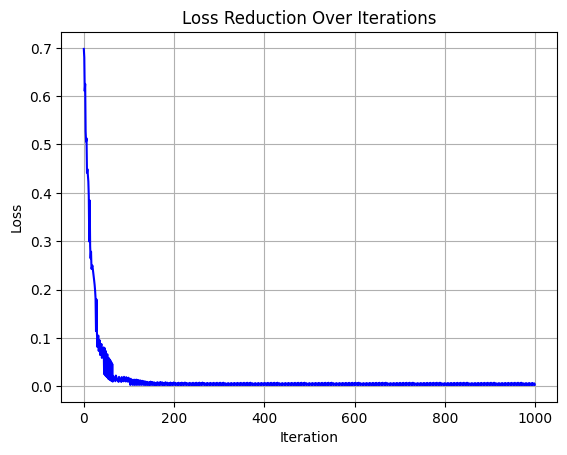

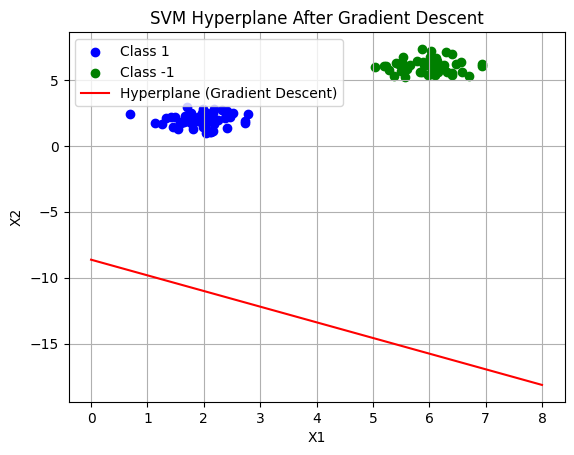

In [5]:
# Gradient descent function to optimize SVM
def svm_gradient_descent(X, y, learning_rate=0.01, lambda_param=0.01, num_iterations=1000):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0
    losses = []

    for _ in range(num_iterations):
        for i, x_i in enumerate(X):
            condition = y[i] * (np.dot(w, x_i) - b) >= 1
            if condition:
                w -= learning_rate * (2 * lambda_param * w)
            else:
                w -= learning_rate * (2 * lambda_param * w - np.dot(x_i, y[i]))
                b -= learning_rate * y[i]

        # Compute the loss function
        hinge_loss = np.maximum(0, 1 - y * (np.dot(X, w) - b))
        loss = lambda_param * np.dot(w, w) + np.mean(hinge_loss)
        losses.append(loss)

    return w, b, losses

# Apply gradient descent to our data
w_opt, b_opt, losses = svm_gradient_descent(X, y)

# Plot the loss over iterations
plt.plot(range(len(losses)), losses, color='blue')
plt.title("Loss Reduction Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

# Plot the final hyperplane after gradient descent
x_vals = np.linspace(0, 8, 100)
y_vals = -(w_opt[0] * x_vals + b_opt) / w_opt[1]

plt.scatter(X1[:, 0], X1[:, 1], color='blue', label='Class 1')
plt.scatter(X2[:, 0], X2[:, 1], color='green', label='Class -1')
plt.plot(x_vals, y_vals, label='Hyperplane (Gradient Descent)', color='red')

plt.title("SVM Hyperplane After Gradient Descent")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid(True)
plt.show()

**Explanation:**

- *Loss Function*: The loss combines a regularization term (to encourage a larger margin) and a hinge loss term (to penalize misclassifications).
- *Gradient Descent*: In each iteration, the weights *w* and bias *b* are updated to minimize the loss function. This process moves the hyperplane to its optimal position.
- *Loss Reduction*: The plot shows how the loss decreases over iterations, demonstrating convergence.

---

**Example 3: SVM with Non-linearly Separable Data**

In real-world scenarios, data may not always be linearly separable. In such cases, SVM uses a technique called *kernel trick* to map data to a higher-dimensional space where it becomes linearly separable.

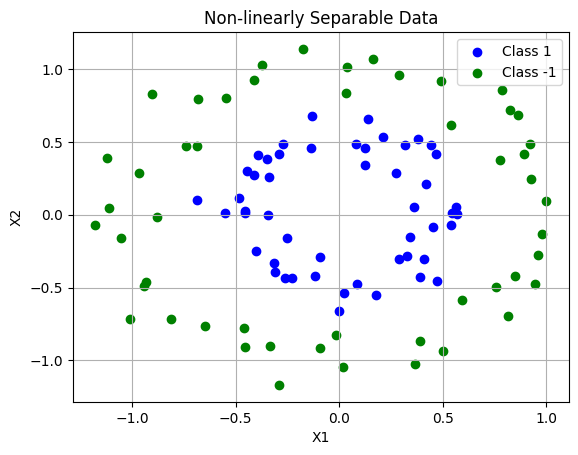

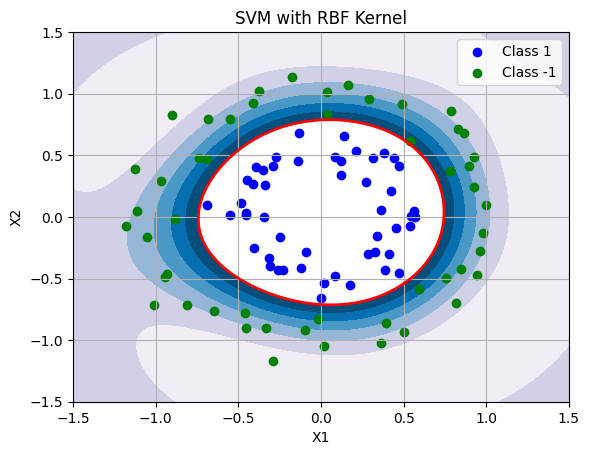

In [6]:
from sklearn.datasets import make_circles
from sklearn.svm import SVC

# Generate non-linearly separable data
X, y = make_circles(n_samples=100, factor=0.5, noise=0.1)
y[y == 0] = -1  # Convert labels to -1 and 1

# Visualize the data
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1')
plt.scatter(X[y == -1, 0], X[y == -1, 1], color='green', label='Class -1')
plt.title("Non-linearly Separable Data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid(True)
plt.show()

# Train a non-linear SVM with the RBF kernel
clf_rbf = SVC(kernel='rbf')
clf_rbf.fit(X, y)

# Plot decision boundary
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 100), np.linspace(-1.5, 1.5, 100))
Z = clf_rbf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1')
plt.scatter(X[y == -1, 0], X[y == -1, 1], color='green', label='Class -1')

plt.title("SVM with RBF Kernel")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid(True)
plt.show()

**Explanation:**

- *Non-linear SVM*: For non-linearly separable data, SVM uses kernel functions like the *RBF (Radial Basis Function)* to map the data into a higher-dimensional space.
- *Decision Boundary*: The decision boundary is no longer a straight line but a non-linear curve, allowing the model to separate classes more effectively.